In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font',**{'family':'sans-serif',
             'sans-serif':['Arial'],
             'size':12})
rc('pdf', fonttype=42)
rc('ps', fonttype=42)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
p_root_dir = Path.cwd().parents[1]
p_data = p_root_dir / "5_data"

# Predictions
p_predictions = p_data / "Interlab_data_19Apr2023.csv"
source = p_predictions.stem

In [3]:
# Load predictions and format neutral loss column
df = pd.read_csv(p_predictions)
df.neutral_loss.fillna('', inplace=True)

# Only consider data of detected ions
threshold = 0.8
df['detectability'] = df.pred_val >= threshold
data = df[df.detectability]

In [4]:
# Sum intensities of detected ions per metabolite in each sample
data['sum_intensity_per_metabolite'] = data.groupby(["Sample name", "name_short"])["spot_intensity_bgr_corrected"].transform('sum')

# Calculate the fractions of detected ion intensities per metabolite in each sample
data['fraction_per_ion'] = data.spot_intensity_bgr_corrected / data.sum_intensity_per_metabolite

<ipython-input-4-52d6c918a8ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sum_intensity_per_metabolite'] = data.groupby(["Sample name", "name_short"])["spot_intensity_bgr_corrected"].transform('sum')
<ipython-input-4-52d6c918a8ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fraction_per_ion'] = data.spot_intensity_bgr_corrected / data.sum_intensity_per_metabolite


### Average effect of signal dilution for detected metabolites

In [ ]:
p_out = p_root_dir / r"6_figures\figure_5\signal_dilution\violin"

In [6]:
# Find what fraction is the most intense detected ion per metabolite in each sample
max_fraction_data = data.pivot_table(index=['Sample name', 'Technology', 'Polarity', 'name_short'],
                                     values=['fraction_per_ion'],
                                     aggfunc=
                                            {'fraction_per_ion':max}).reset_index()

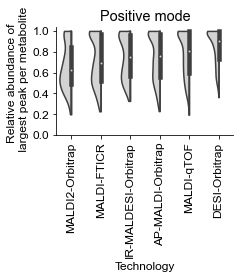

In [13]:
title = "extent_of_signal_dilution_pos"

custom_order = ['MALDI2-Orbitrap',
                'MALDI-FTICR',
                'IR-MALDESI-Orbitrap',
                'AP-MALDI-Orbitrap',
                'MALDI-qTOF',  
                'DESI-Orbitrap'
]

plt.figure(figsize=(3.5,4))
g = sns.violinplot(data = max_fraction_data[max_fraction_data.Polarity=='positive'], 
                   x='Technology', y='fraction_per_ion',
                   scale='count', cut=0, inner = "box",
                   order=custom_order,
                   # to plot half of the violin
                   hue=True, hue_order=[True, False], split=True)

g.legend_ = None
g.set(xlabel="Technology", 
      ylabel = "Relative abundance of \n largest peak per metabolite",
      title = "Positive mode")

# Make violins white
for violin in g.collections:
    violin.set_facecolor(to_rgba('lightgrey'))

g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)
g.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
sns.despine()
plt.tight_layout()

g.figure.savefig(p_out / f"{title}.png")
g.figure.savefig(p_out / f"{title}.pdf", transparent=True)

In [38]:
print(f"Median range {np.around(max_fraction_data[max_fraction_data.Polarity=='positive'].groupby('Technology').agg('median').min()[0],2)}-\
      {np.around(max_fraction_data[max_fraction_data.Polarity=='positive'].groupby('Technology').agg('median').max()[0], 2)}")

Median range 0.62-      0.9


<ipython-input-38-67ab88fa7020>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(f"Median range {np.around(max_fraction_data[max_fraction_data.Polarity=='positive'].groupby('Technology').agg('median').min()[0],2)}-\
<ipython-input-38-67ab88fa7020>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  {np.around(max_fraction_data[max_fraction_data.Polarity=='positive'].groupby('Technology').agg('median').max()[0], 2)}")


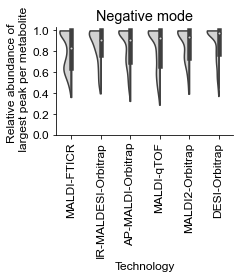

In [12]:
title = "extent_of_signal_dilution_neg"

custom_order = [
                'MALDI-FTICR',
                'IR-MALDESI-Orbitrap',
                'AP-MALDI-Orbitrap',
                'MALDI-qTOF', 
                'MALDI2-Orbitrap',
                'DESI-Orbitrap'
]

plt.figure(figsize=(3.5,4))
g = sns.violinplot(data = max_fraction_data[max_fraction_data.Polarity=='negative'], 
                   x='Technology', y='fraction_per_ion',
                   scale='count', cut=0, inner = "box",
                   order=custom_order,
                   # to plot half of the violin
                   hue=True, hue_order=[True, False], split=True)


g.legend_ = None
g.set(xlabel="Technology", 
      ylabel = "Relative abundance of \n largest peak per metabolite",
      title = "Negative mode")

# Make violins white
for violin in g.collections:
    violin.set_facecolor(to_rgba('lightgrey'))

g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)
g.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
sns.despine()
plt.tight_layout()

g.figure.savefig(p_out / f"{title}.png")
g.figure.savefig(p_out / f"{title}.pdf", transparent=True)

In [35]:
print(f"Median range {np.around(max_fraction_data[max_fraction_data.Polarity=='negative'].groupby('Technology').agg('median').min()[0],2)}-\
      {np.around(max_fraction_data[max_fraction_data.Polarity=='negative'].groupby('Technology').agg('median').max()[0], 2)}")

Median range 0.83-      0.97


<ipython-input-35-f5b865da7ff2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(f"Median range {np.around(max_fraction_data[max_fraction_data.Polarity=='negative'].groupby('Technology').agg('median').min()[0],2)}-\
<ipython-input-35-f5b865da7ff2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  {np.around(max_fraction_data[max_fraction_data.Polarity=='negative'].groupby('Technology').agg('median').max()[0], 2)}")
